<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-09-Wednesday" data-toc-modified-id="Week-09-Wednesday-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week 09 Wednesday</a></span></li><li><span><a href="#Basic-Feedback-Control-for-Robots" data-toc-modified-id="Basic-Feedback-Control-for-Robots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic Feedback Control for Robots</a></span></li><li><span><a href="#Feedback-Control:-a-conceptual-introduction" data-toc-modified-id="Feedback-Control:-a-conceptual-introduction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feedback Control: a conceptual introduction</a></span></li><li><span><a href="#Feedback-Control:-a-conceptual-introduction" data-toc-modified-id="Feedback-Control:-a-conceptual-introduction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feedback Control: a conceptual introduction</a></span></li><li><span><a href="#Feedback-Control:-a-conceptual-introduction" data-toc-modified-id="Feedback-Control:-a-conceptual-introduction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feedback Control: a conceptual introduction</a></span></li><li><span><a href="#Feedback-Control:-a-conceptual-introduction" data-toc-modified-id="Feedback-Control:-a-conceptual-introduction-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feedback Control: a conceptual introduction</a></span></li><li><span><a href="#Feedback-Control:-a-conceptual-introduction" data-toc-modified-id="Feedback-Control:-a-conceptual-introduction-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feedback Control: a conceptual introduction</a></span></li><li><span><a href="#Closed-Loop-Control-for-Romi-Navigation" data-toc-modified-id="Closed-Loop-Control-for-Romi-Navigation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Closed Loop Control for Romi Navigation</a></span></li><li><span><a href="#Exercise:-Make-Romi-move-with-a-specified-forward-velocity-and-yaw-rate." data-toc-modified-id="Exercise:-Make-Romi-move-with-a-specified-forward-velocity-and-yaw-rate.-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise: Make Romi move with a specified forward velocity and yaw rate.</a></span></li><li><span><a href="#Exercise:-Make-Romi-move-with-a-specified-forward-velocity-and-yaw-rate." data-toc-modified-id="Exercise:-Make-Romi-move-with-a-specified-forward-velocity-and-yaw-rate.-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exercise: Make Romi move with a specified forward velocity and yaw rate.</a></span></li><li><span><a href="#Exercise:-Make-the-Romi-reach-a-desired-location-using-feedback-control" data-toc-modified-id="Exercise:-Make-the-Romi-reach-a-desired-location-using-feedback-control-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Exercise: Make the Romi reach a desired location using feedback control</a></span></li></ul></div>

## Week 09 Wednesday
Wednesday, Oct 23, 2024

**Announcements**
* A06 feedback coming soon (still... sorry) 

**Goals** 
* Feedback control for robots (an introduction)
* Continue in-class exercise for Romi differential kinematics (constant radius turn)
* Once that works, move on to feedback control exercise!

## Basic Feedback Control for Robots

So far in ES302, we have learned:
1. How to organize high-level robot behaviors with finite state machines
2. How to model the *dynamic* behavior of robots consisting of electromechanical systems
3. How to use and calibrate a robot's sensors (encoders, distance sensors, etc)
3. How to express the positions of objects in the robot's world (or parts of the robot) in different frames of reference
4. How to compute the position of a robot's end-effector in space given the robot's joint *configuration*
5. How to compute the required joint configuration for a robot's end-effector to reach a specified position in space
6. How to compute the *velocity* of a robot's end-effector given its joint velocities (and vice-versa)
7. How to use a robot's Jacobian to compute the joint forces and torques required to react a disturbance force from the robot's environent

## Feedback Control: a conceptual introduction

## Feedback Control: a conceptual introduction

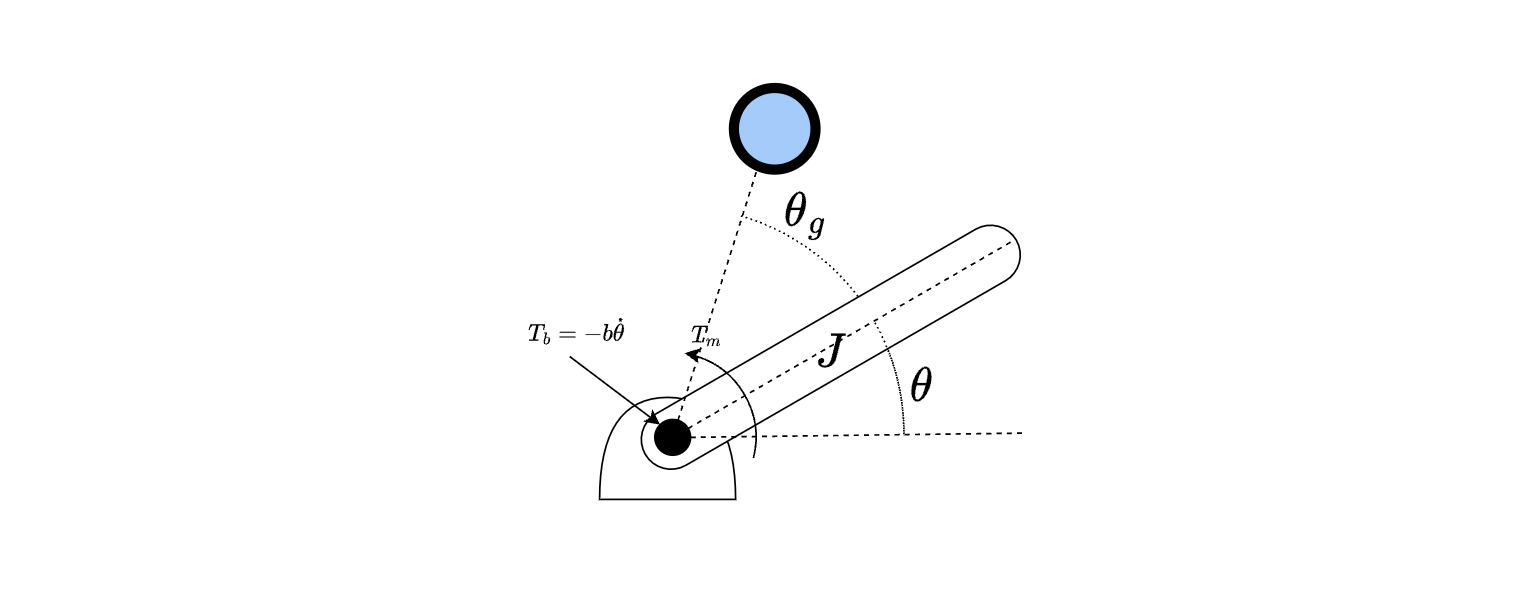

\begin{equation}
\ddot{\theta} = -\frac{b}{J}\dot{\theta} + \frac{1}{J}T_m
\end{equation}

## Feedback Control: a conceptual introduction

Analyzing and [characterizing](../04_Mathematical_Modeling/04_Mathematical_Modeling.ipynb#Eigenvalues-and-characteristic-equation) this (second-order) differential equation would tell you that it has two eigenvalues:
1. One at $\lambda=0$, which is an "integrator" type behavior (if I apply a constant torque to the system, its position will keep increasing forever)
2. One at $\lambda=-\frac{b}{J}$, meaning that the *velocity* for the system reaches a steady state for a constant positive torque, and if no torque is applied, the system's velocity will asymptotically approach 0.

This is *not* the behavior we want. We "want" the angle $\theta$ to reach the "goal" angle of the glass of water.  **HOW COULD WE ACHIEVE THIS?**

## Feedback Control: a conceptual introduction

If we define "error" as:

\begin{equation}
e = \theta_g - \theta
\end{equation}

Then we can make our "rule:"

\begin{equation}
T_m = K_p e = K_p\left(\theta_g-\theta\right)
\end{equation}

We can substitute this "rule" back into Equation 1, which **defines a "new input" of the goal angle of the glass,** $\theta_g$.

\begin{equation}
\ddot{\theta} = -\frac{b}{J}\dot{\theta} + \frac{K_p}{J}\left(\theta_g - \theta\right)
\end{equation}

## Feedback Control: a conceptual introduction

In [1]:
%%html
<iframe id="inlineFrameExample" title="Inline Frame Example" width="1000" height="900" src="https://workbench.lafayette.edu/~brownaa/ME480/glassgrab_sim/glassgrab.html"> </iframe>

## Closed Loop Control for Romi Navigation

We can use the concept of closed loop feedback control to "force" our Romi to reach a goal location in task space (the Allocentric or earth-fixed frame). See the setup below:

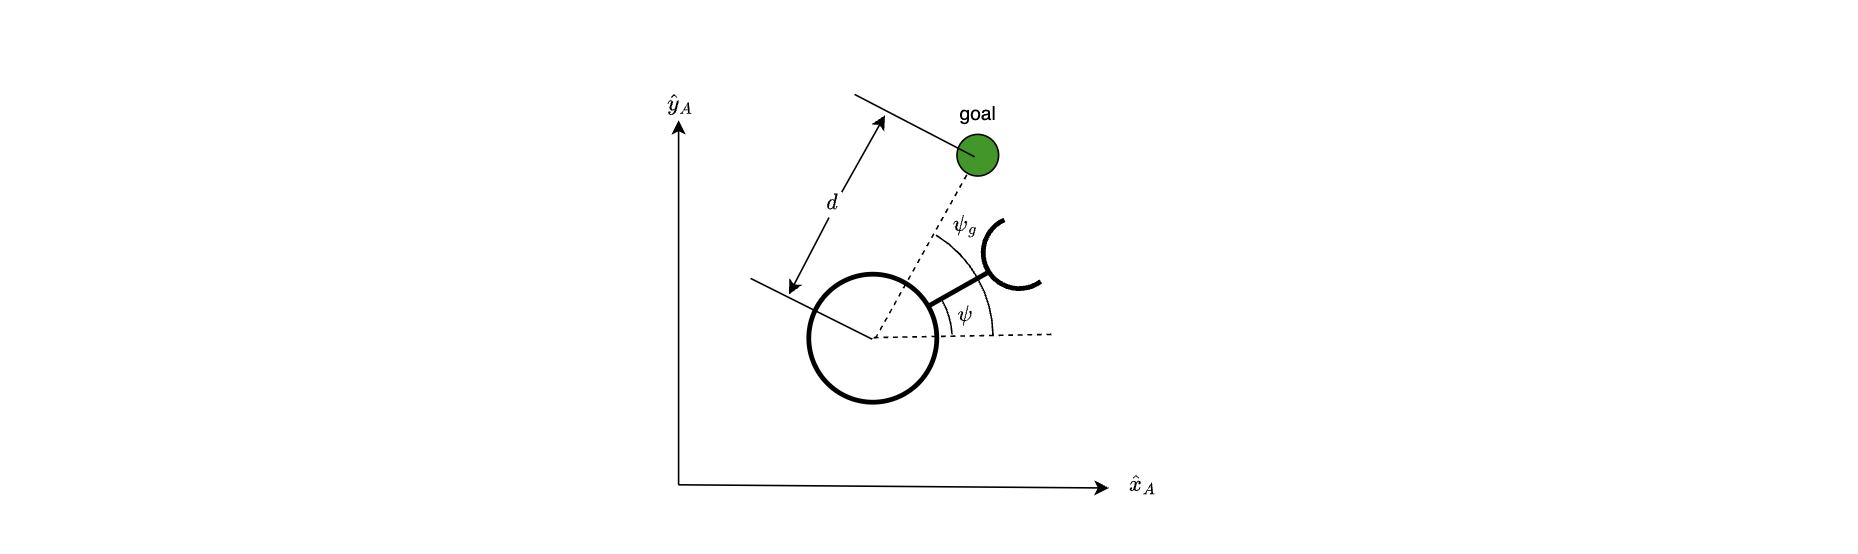

Closing the loop to reach our goal position, we can write:

\begin{equation}
\begin{aligned}
U &= K_U d \\
\dot{\psi} &= K_\psi \left(\psi_g - \psi\right)
\end{aligned}
\end{equation}

Using our figure to compute $d$ and $\psi_g$ yields the following equations representing our "control law:"

\begin{equation}
\begin{aligned}
U &= K_U \sqrt{(^Ax_g-^Ax)^2+(^Ay_g-^Ay)^2} \\
\dot{\psi} &= K_\psi \left(\tan^{-1}\left(\frac{^Ay_g-^Ay}{^Ax_g-^Ax}\right) - \psi\right)
\end{aligned}
\end{equation}

Once the commanded $U$ and $\dot{\psi}$ are computed, the Romi's Jacobian can be used to map these goal velocities into goal wheel velocities, and the Romi should move towards its goal. Note that choosing the correct $K_U$ and $K_\psi$ values will, for now, have to be experimental. The equations representing the Romi's motion are nonlinear, meaning that choosing a "good" set of control gains is not as simple as looking at the system's eigenvalues (as it was for the glass-grab example). 

## Exercise: Make Romi move with a specified forward velocity and yaw rate. 

If we wanted Romi to move in a circle of radius $R$ at some foward speed $U$, we could compute a goal yaw rate for the robot as:

\begin{equation}
\psi_g = \frac{U}{R}
\end{equation}

This means that we could specify a "goal" for the Romi's body-fixed task space as:

\begin{equation}
\vec{q}_g = \begin{bmatrix}^B\dot{x}_g & ^B\dot{y}_g & ^B\dot{\psi}_g\end{bmatrix}=\begin{bmatrix}U & 0 &  \frac{U}{R}\end{bmatrix}
\end{equation}

Then, we could make the Romi achieve this goal in its "body-fixed task space" by moving its wheels at:

\begin{equation}
\vec{q} = \begin{bmatrix}\omega_R \\ \omega_L\end{bmatrix} = \underbrace{\begin{bmatrix} \frac{R_w}{2} & \frac{R_w}{2} \\ 0 & 0 \\\frac{R_w}{2r} & -\frac{R_w}{2r} \end{bmatrix}^+}_{J^+}\underbrace{\begin{bmatrix}U  \\ 0  \\  \frac{U}{R}\end{bmatrix}}_{\vec{\mathcal{V}}_b}
\end{equation}

You can use the constant 400/15.7 to approximately map motor voltage in "counts" to steady state wheel speed in rad/s.

## Exercise: Make Romi move with a specified forward velocity and yaw rate. 

In the Week09_World in Webots, implement inverse differential kinematics as shown above to achieve any given yaw rate and any given forward speed. There is a "Starter Controller" in that world for your use. You will need to:
* Calculate wheel speeds
* compute yaw rate
* compute forward Romi speed
* Compute the Jacobian
* Compute the pseudoinverse of the Jacobian
* Compute wheel speeds needed to achieve the desired yaw rate and forward velocity, ultimately achieving your goal turn radius $R$.

Finally, use the supervisor and/or your measurements of **true** robot motion (from odometry and wheel encoder speed measurements) to compare Romi's actual motion with your goal for its motion.

## Exercise: Make the Romi reach a desired location using feedback control

* Specify a goal location in the Romi's world
* Use feedback control to get commanded forward velocity and yaw rate for the Romi (use odometry estimates!)
* Use inverse differential kinematics to turn those commands into Romi wheel speeds

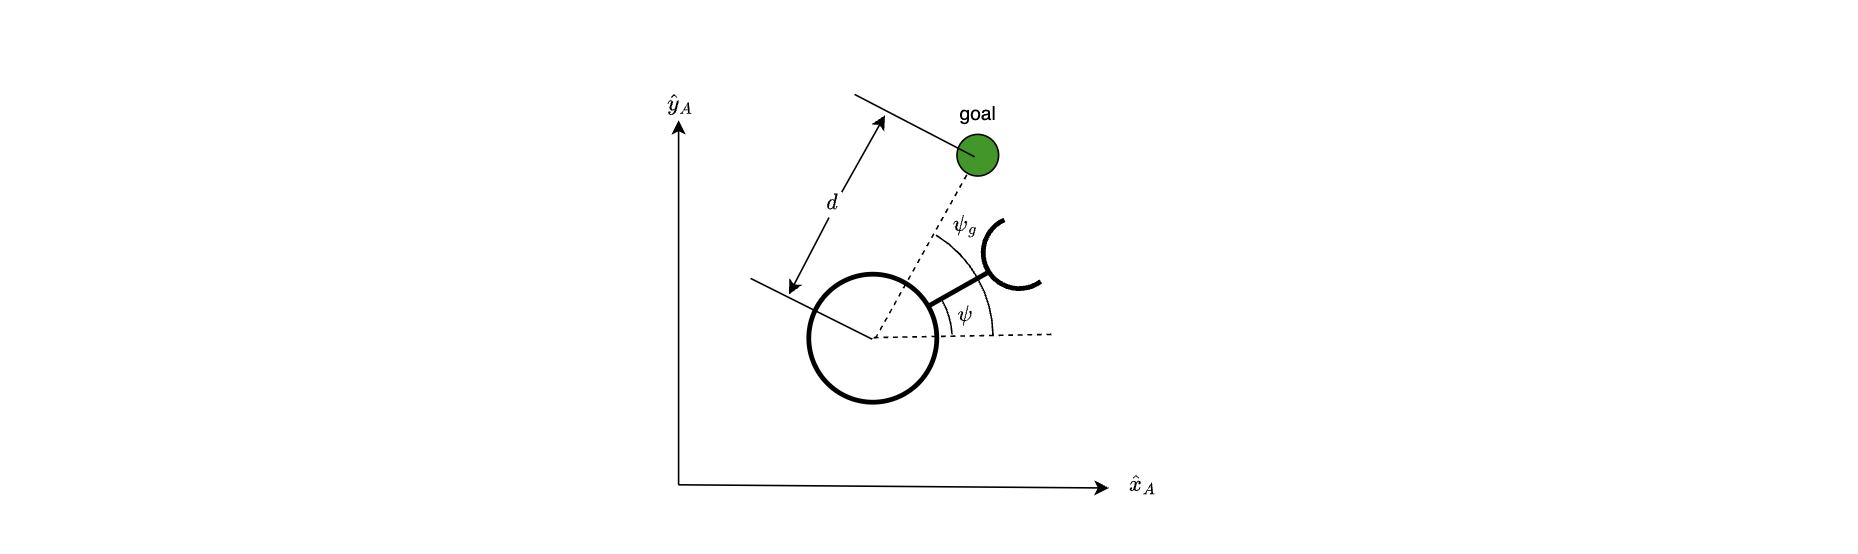

\begin{equation}
\begin{aligned}
U &= K_U \sqrt{(^Ax_g-^Ax)^2+(^Ay_g-^Ay)^2} \\
\dot{\psi} &= K_\psi \left(\tan^{-1}\left(\frac{^Ay_g-^Ay}{^Ax_g-^Ax}\right) - \psi\right)
\end{aligned}
\end{equation}